# Assignment-2:
# Abdelrahman Sayed_______20201114
# Seif El-Din Mohamed_____20200239
# Shahd Fekry ali_________20201101
# Mariam Alaa Eldeen______20200525
# Wessam Fawzy____________20201215


# Problem-1


## Import Libraries

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer # Trasform Column 
from sklearn.preprocessing import OneHotEncoder # Kind of Encoding (Transformation)
import numpy as np
from sklearn.preprocessing import LabelEncoder

## import Data from Dataset

In [4]:
dataset = pd.read_csv('drug.csv')

## Data Preprocessing

### Count Missing Values Occurs

In [5]:
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64


### Handling Missing Data Features

In [6]:
# We Will Drop Records which have no BP and cholestrol Features
dataset.dropna(subset=['BP', 'Cholesterol'], inplace=True)

# Then We Will Fill Records has no Na_to_K Feature with Average of Na_to_K Values
dataset['Na_to_K'].fillna(dataset['Na_to_K'].mean(), inplace=True)


### Double-Check Missing Features


In [7]:
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


### Split Dataset Into Feature set and Target set

In [31]:
X = dataset.iloc[ : , : -1].values
Y = dataset.iloc[ : , -1].values
X

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 16.08220512820512],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703],
       [16, 'F', 'HIGH', 'NORMAL', 15.516],
       [69, 'M', 'LOW', 'NORMAL', 11.455],
       [43, 'M', 'HIGH', 'HIGH', 13.972],
       [23, 'M', 'LOW', 'HIGH', 7.298],
       [32, 'F', 'HIGH', 'NORMAL', 25.974],
       [57, 'M', 'LOW', 'NORMAL', 19.128],
       [63, 'M', 'NORMAL', 'HIGH', 25.917],
       [47, 'M', 'LOW', 'NORMAL', 30.568],
       [48, 'F', 'LOW', 'HIGH', 15.036],
       [33, '

### Encode Categorical Data in Features (One-Hot Encoding)

In [46]:
# kind of transformation, Encoder algo, idx of column, remainder of columns passthrough without any transformations
ct = ColumnTransformer( transformers = [('encoder', OneHotEncoder(), [1, 2, 3])], remainder='passthrough') 
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 0.0, 23, 25.355],
       [0.0, 1.0, 1.0, ..., 0.0, 47, 13.093],
       [0.0, 1.0, 1.0, ..., 0.0, 47, 10.114],
       ...,
       [0.0, 1.0, 1.0, ..., 0.0, 16, 12.006],
       [0.0, 1.0, 1.0, ..., 0.0, 52, 9.894],
       [1.0, 0.0, 1.0, ..., 1.0, 40, 11.349]], dtype=object)

### Encode Target Data (Label Encoding)

In [48]:
le = LabelEncoder()
Y = np.array(le.fit_transform(Y))
Y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3, 3,
       3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4, 0,
       3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4, 0,
       3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4, 3, 4,
       4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3, 4, 2,
       0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4, 4,
       4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3, 3])

## 1st Experiment

In [55]:
random_states = [1736,0, 123, 789, 987, 654]

max_accuracy = -100
best_experiment = 0
best_treesize = -1
for i in range(5):

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_states[i])

    model = DecisionTreeClassifier()
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy >= max_accuracy:
        max_accuracy = accuracy
        best_experiment = i+1
        best_treesize = model.tree_.node_count

    print(f"Experiment {i+1} with Tree Size: {model.tree_.node_count} and Accuracy: {accuracy}")
print("\n")
print(f"Best Experiment: {best_experiment}\nAccuracy: {max_accuracy}\nTree Size: {best_treesize}")


Experiment 1 with Tree Size: 15 and Accuracy: 1.0
Experiment 2 with Tree Size: 15 and Accuracy: 0.9661016949152542
Experiment 3 with Tree Size: 15 and Accuracy: 0.8983050847457628
Experiment 4 with Tree Size: 11 and Accuracy: 0.9661016949152542
Experiment 5 with Tree Size: 15 and Accuracy: 0.9661016949152542


Best Experiment: 1
Accuracy: 1.0
Tree Size: 15


## 2nd Experiment


   Training Set Size  Mean Accuracy  Max Accuracy  Min Accuracy  \
0                0.3       0.952174      0.992754      0.876812   
1                0.4       0.977966      0.991525      0.966102   
2                0.5       0.971429      0.989796      0.959184   
3                0.6       0.974684      0.987342      0.962025   
4                0.7       0.972881      0.983051      0.966102   

   Mean Tree Size  Max Tree Size  Min Tree Size  
0            13.0             17             11  
1            13.4             15             11  
2            13.4             15             11  
3            13.4             15             11  
4            13.4             15             11  


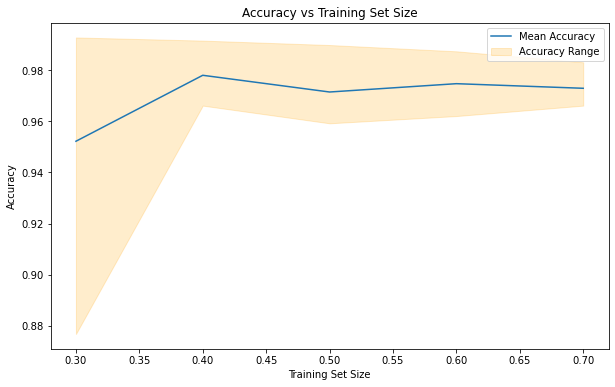

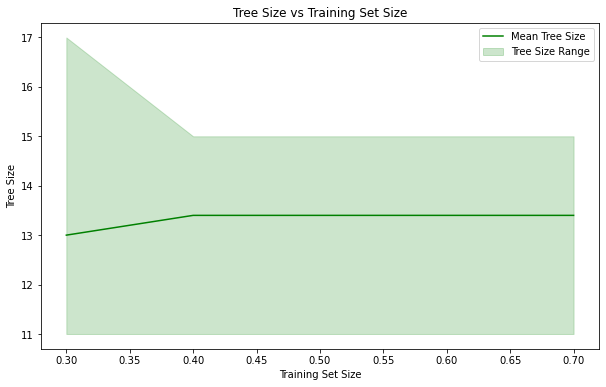

In [72]:
# %% [markdown]
# ## Experiment with a Range of Train-Test Split Ratios

# %%
# Define the range of training set sizes
train_size = 0.3

# Initialize lists to store statistics
mean_accuracies = []
max_accuracies = []
min_accuracies = []
mean_tree_sizes = []
max_tree_sizes = []
min_tree_sizes = []

# Loop through different training set sizes using while loop
while train_size <= 0.7:
    # Initialize lists to store results for each random seed
    accuracies = []
    tree_sizes = []

    # Run the experiment with five different random seeds
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=(1 - train_size), random_state=random_states[i])

        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        accuracies.append(accuracy)
        tree_sizes.append(model.tree_.node_count)

    # Calculate mean, max, and min statistics for the current training set size
    mean_accuracies.append(np.mean(accuracies))
    max_accuracies.append(np.max(accuracies))
    min_accuracies.append(np.min(accuracies))
    mean_tree_sizes.append(np.mean(tree_sizes))
    max_tree_sizes.append(np.max(tree_sizes))
    min_tree_sizes.append(np.min(tree_sizes))

    # Increment training_size
    train_size += 0.1

# Display the statistics
report = pd.DataFrame({
    'Training Set Size': np.arange(0.3, 0.8, 0.1),
    'Mean Accuracy': mean_accuracies,
    'Max Accuracy': max_accuracies,
    'Min Accuracy': min_accuracies,
    'Mean Tree Size': mean_tree_sizes,
    'Max Tree Size': max_tree_sizes,
    'Min Tree Size': min_tree_sizes
})

print(report)

# Plotting accuracy against training set size
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.3, 0.8, 0.1), mean_accuracies, label='Mean Accuracy')
plt.fill_between(np.arange(0.3, 0.8, 0.1), min_accuracies, max_accuracies, alpha=0.2, color='orange', label='Accuracy Range')
plt.title('Accuracy vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting tree size against training set size
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.3, 0.8, 0.1), mean_tree_sizes, label='Mean Tree Size', color='green')
plt.fill_between(np.arange(0.3, 0.8, 0.1), min_tree_sizes, max_tree_sizes, alpha=0.2, color='green', label='Tree Size Range')
plt.title('Tree Size vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.legend()
plt.show()
